In [1]:
import tensorflow as tf

fmnist = tf.keras.datasets.fashion_mnist

In [2]:
(X_train, y_train), (X_test, y_test) =fmnist.load_data()

In [4]:
X_test.shape, y_train.shape

((10000, 28, 28), (60000,))

In [5]:
assert X_train.shape == (60000, 128, 28)

AssertionError: 

In [6]:
assert X_train.shape == (60000, 28, 28)

In [8]:
print("Train: X=%s, y=%s" % (X_train.shape,y_train.shape))
print("Test: X=%s, y=%s" % (X_test.shape,y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


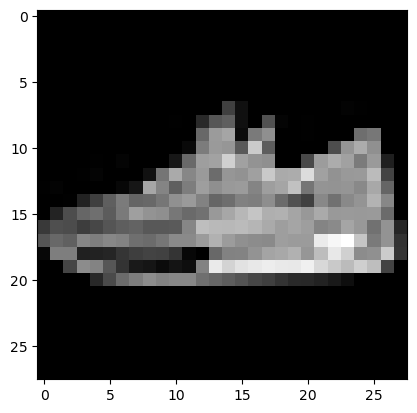

In [9]:
import cv2
import matplotlib.pyplot as plt
img = cv2.cvtColor(X_train[1023],cv2.COLOR_BGR2RGB)
plt.imshow(img)

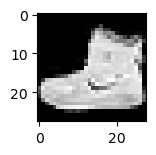

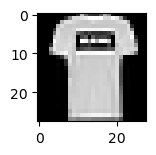

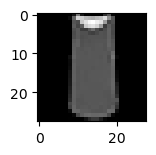

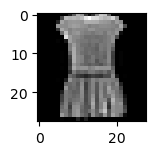

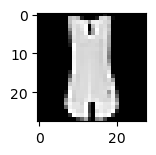

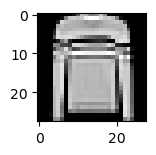

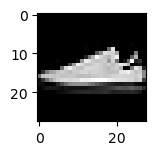

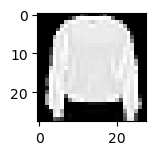

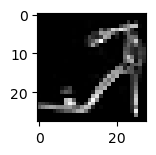

In [10]:
for i in range(9):
    #define subplot
    plt.subplot(330 + 1 + i)
    #plot the raw pixel data
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))

    plt.show()

In [11]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units=92,activation="relu"), #tf.nn.relu
    tf.keras.layers.Dense(units=10, activation="softmax")
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 92)                72220     
                                                                 
 dense_1 (Dense)             (None, 10)                930       
                                                                 
Total params: 73,150
Trainable params: 73,150
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(optimizer="adam",metrics="accuracy",loss="sparse_categorical_crossentropy")

In [15]:
model.fit(X_train,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5107 - accuracy: 0.8236
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3846 - accuracy: 0.8630
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3469 - accuracy: 0.8735
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3225 - accuracy: 0.8828
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3041 - accuracy: 0.8885


In [16]:
test_loss, test_acc = model.evaluate(X_test, y_test)
test_loss, test_acc

313/313 [==============================] - 2s 4ms/step - loss: 0.3730 - accuracy: 0.8672


(0.3729805648326874, 0.8672000169754028)

In [17]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3730 - accuracy: 0.8672


[0.3729805648326874, 0.8672000169754028]

In [21]:
X_train[:10].shape

(10, 28, 28)

In [19]:
y_pred = model.predict(X_train[:10])

1/1 [==============================] - 0s 139ms/step


In [25]:
import numpy as np

In [26]:
y_pred_class=[np.argmax(i) for i in y_pred]

In [27]:
y_pred_class

[9, 0, 0, 3, 3, 2, 7, 4, 5, 5]

In [28]:
y_test[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [34]:
history = model.fit(X_train,y_train,epochs = 5, validation_data=(X_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5122 - accuracy: 0.8241 - val_loss: 0.4594 - val_accuracy: 0.8381
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3838 - accuracy: 0.8618 - val_loss: 0.4037 - val_accuracy: 0.8537
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3448 - accuracy: 0.8732 - val_loss: 0.4053 - val_accuracy: 0.8534
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3219 - accuracy: 0.8815 - val_loss: 0.3682 - val_accuracy: 0.8638
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3022 - accuracy: 0.8878 - val_loss: 0.3568 - val_accuracy: 0.8703


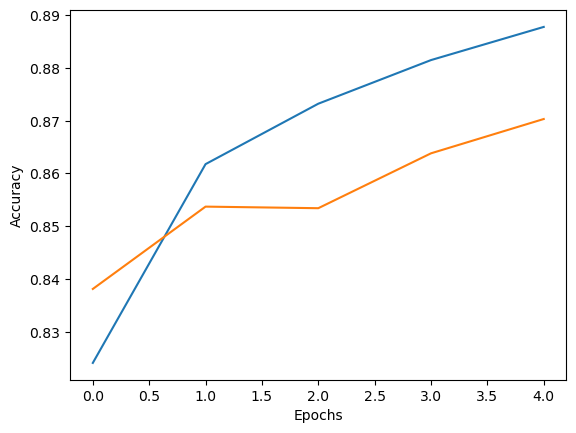

In [36]:
#Plotting accuracy
plt.plot(history.history["accuracy"],label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

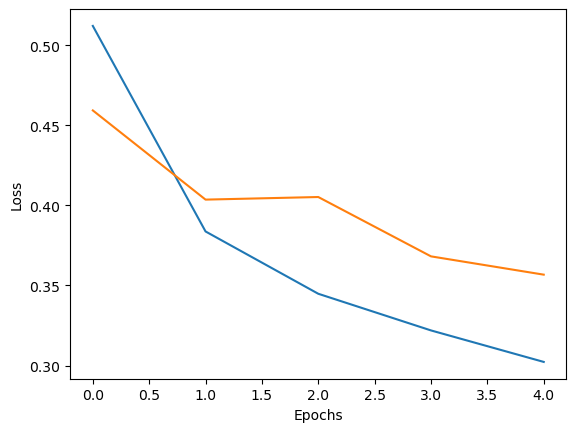

In [35]:
#Plotting accuracy
plt.plot(history.history["loss"],label="Training loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()